In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

##import pydotplus
##import grpahviz
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score

In [2]:
data=pd.read_csv('C:/Users/Manzoo/Learning/Project Day 3/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA


In [3]:
data.shape

(45211, 17)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [6]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [7]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


data.dtypes

In [8]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


# Check Missing Values

In [9]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [11]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [15]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [16]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [17]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [18]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [19]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

## FIve point summary

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


C:\Users\Manzoo\Learning\LetsUpgrade-AI-ML\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


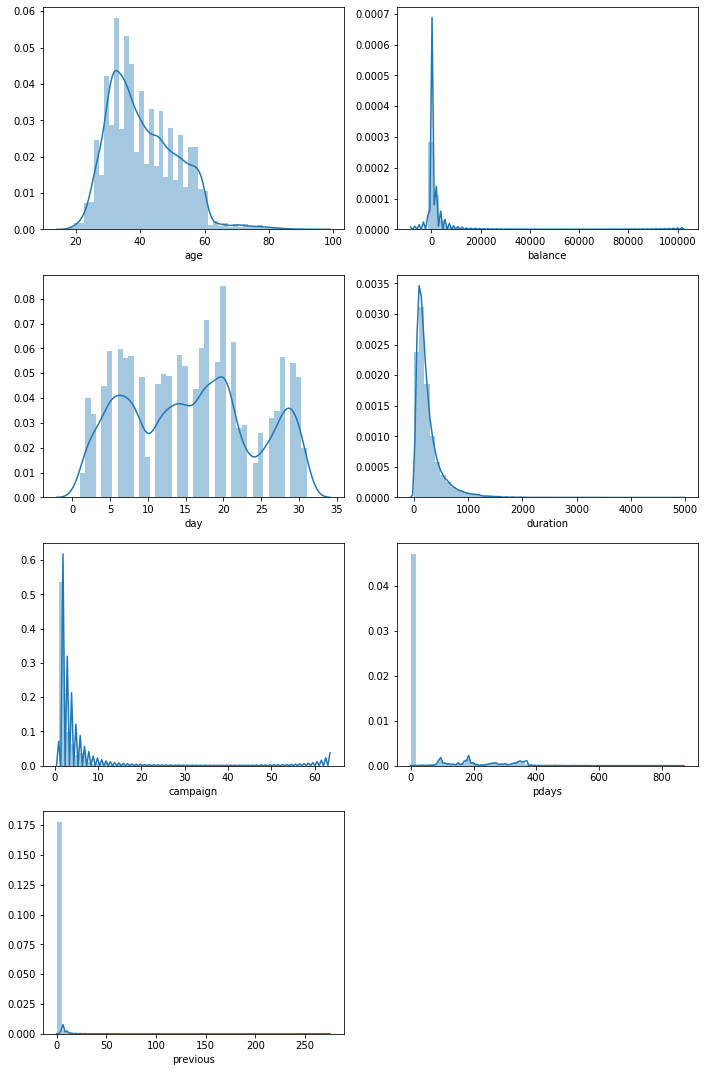

In [21]:
fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5],kde_kws={'bw':0.1})
sns.distplot(data['previous'],ax=axe[6],kde_kws={'bw':0.1})

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)


C:\Users\Manzoo\Learning\LetsUpgrade-AI-ML\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


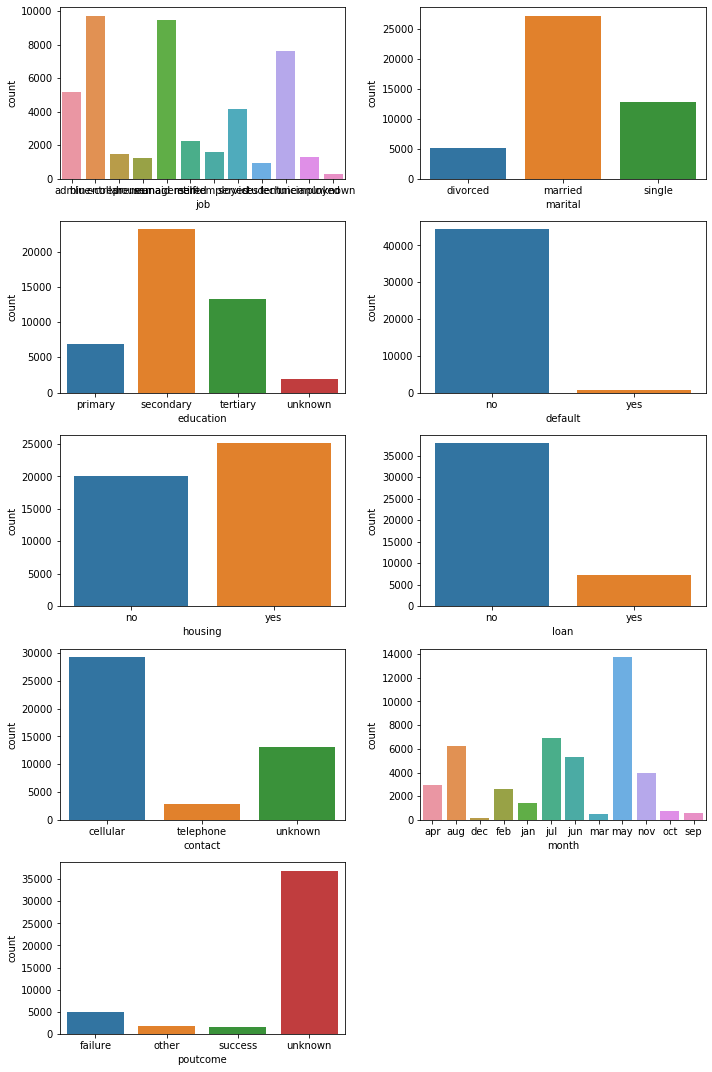

In [22]:
fig , axe = plt.subplots(nrows=5,ncols=2,figsize=(10,15))
axe=axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
#plt.setp(plt.get_xticklabelst(),rotation=90)


sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])


fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)


More than 90% customers have no default credit.

80% customers have not subscribed for term deposit.

most customer have been contacted in May month.

most customers have been contacted via mobile.

number of customers who have housing loan is more than the number of customers who dont.

# Skewness

In [23]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


# Outliers

C:\Users\Manzoo\Learning\LetsUpgrade-AI-ML\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


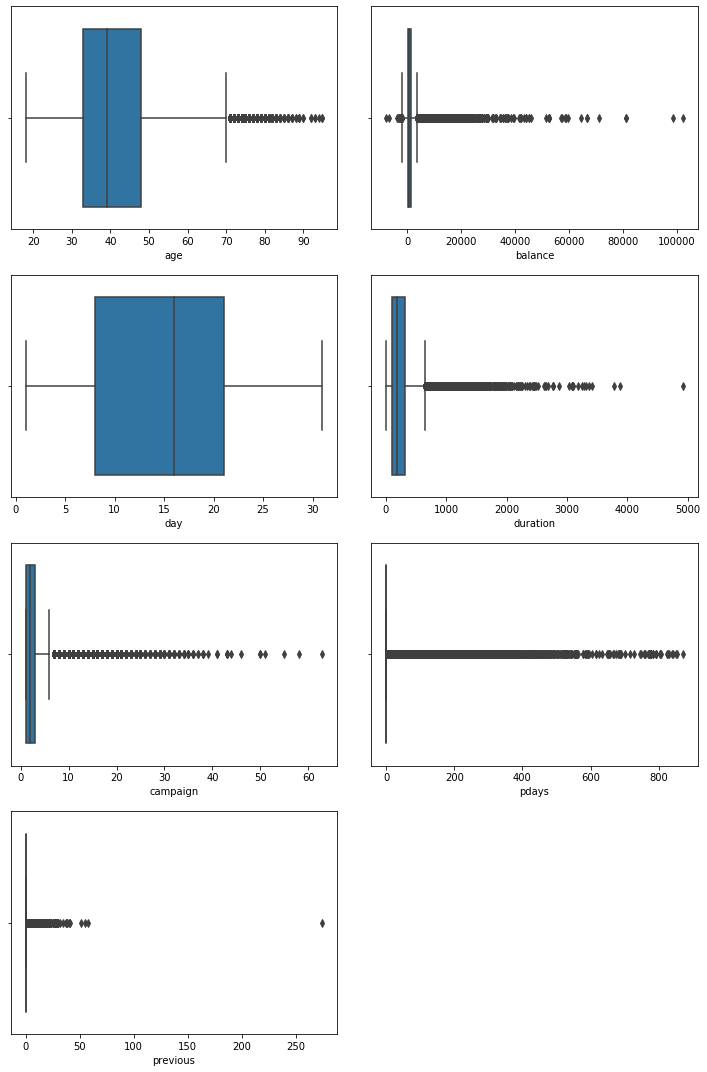

In [24]:
fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(x='age',data=data, ax=axe[0])
sns.boxplot(x='balance',data=data, ax=axe[1])
sns.boxplot(x='day',data=data, ax=axe[2])
sns.boxplot(x='duration',data=data, ax=axe[3])
sns.boxplot(x='campaign',data=data, ax=axe[4])
sns.boxplot(x='pdays',data=data, ax=axe[5])
sns.boxplot(x='previous',data=data, ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [25]:
data['Target'].value_counts().to_frame('Target feature distribution')

,Target feature distribution
no,39922
yes,5289


In [26]:
df=data.copy()
encoder=LabelEncoder()
df['default']=encoder.fit_transform(df['default']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [29]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handling outliers with mean replacement

In [31]:
meanbal=float(df['balance'].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

In [32]:
meandur=float(df['duration'].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration'])

In [33]:
meancam=float(df['campaign'].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75),meancam,df['campaign'])

In [34]:
meanpdays=float(df['pdays'].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75),meanpdays,df['pdays'])

In [35]:
meanpr=float(df['previous'].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75),meanpr,df['previous'])

## After removing outliers

C:\Users\Manzoo\Learning\LetsUpgrade-AI-ML\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


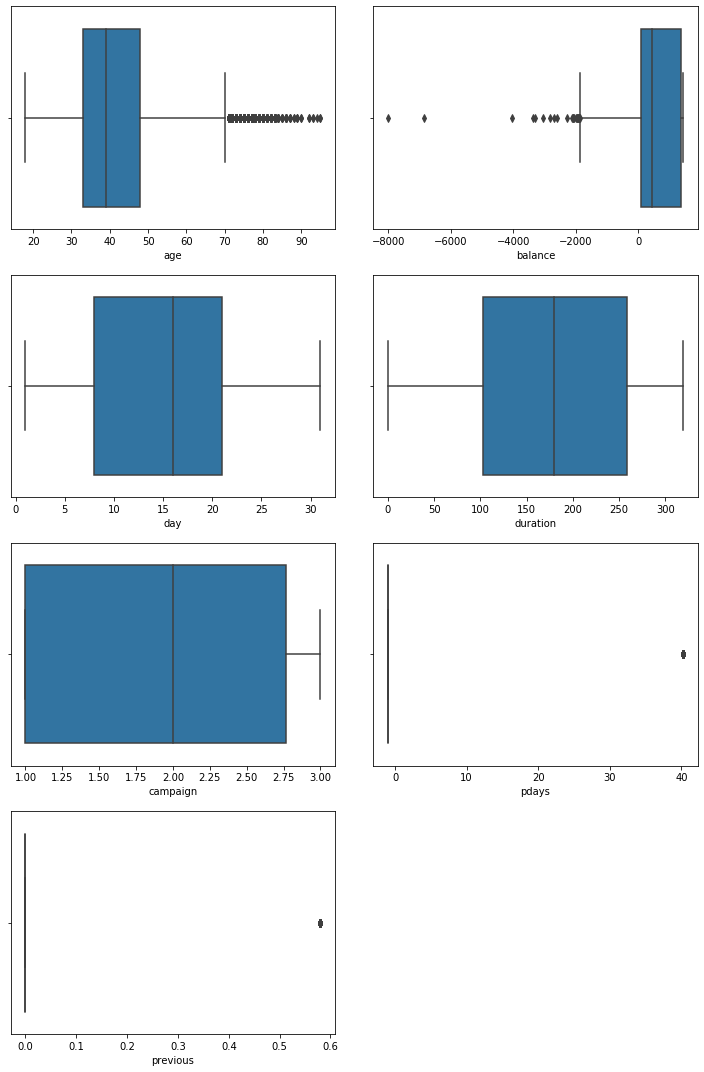

In [36]:
fig , axe = plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.boxplot(x='age',data=df, ax=axe[0])
sns.boxplot(x='balance',data=df, ax=axe[1])
sns.boxplot(x='day',data=df, ax=axe[2])
sns.boxplot(x='duration',data=df, ax=axe[3])
sns.boxplot(x='campaign',data=df, ax=axe[4])
sns.boxplot(x='pdays',data=df, ax=axe[5])
sns.boxplot(x='previous',data=df, ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

## Correlation Plot

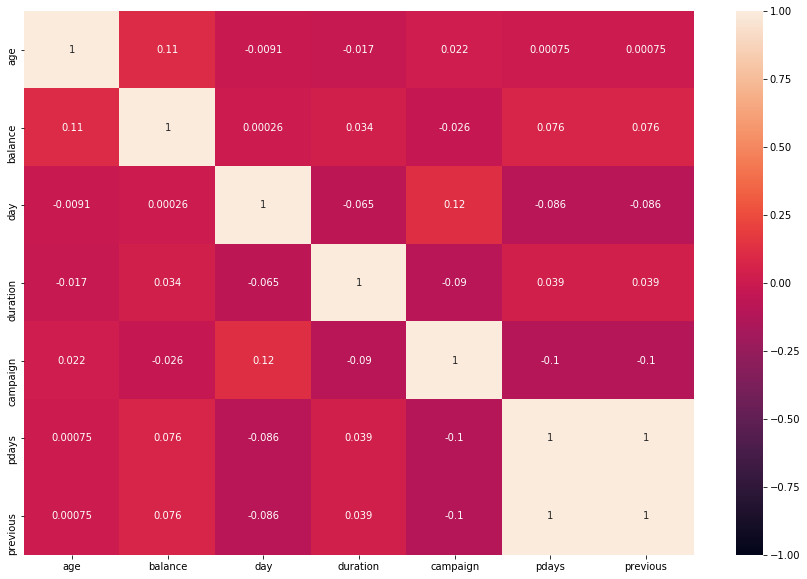

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

In [38]:
    df2=df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
    df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


## Pairplot of the features

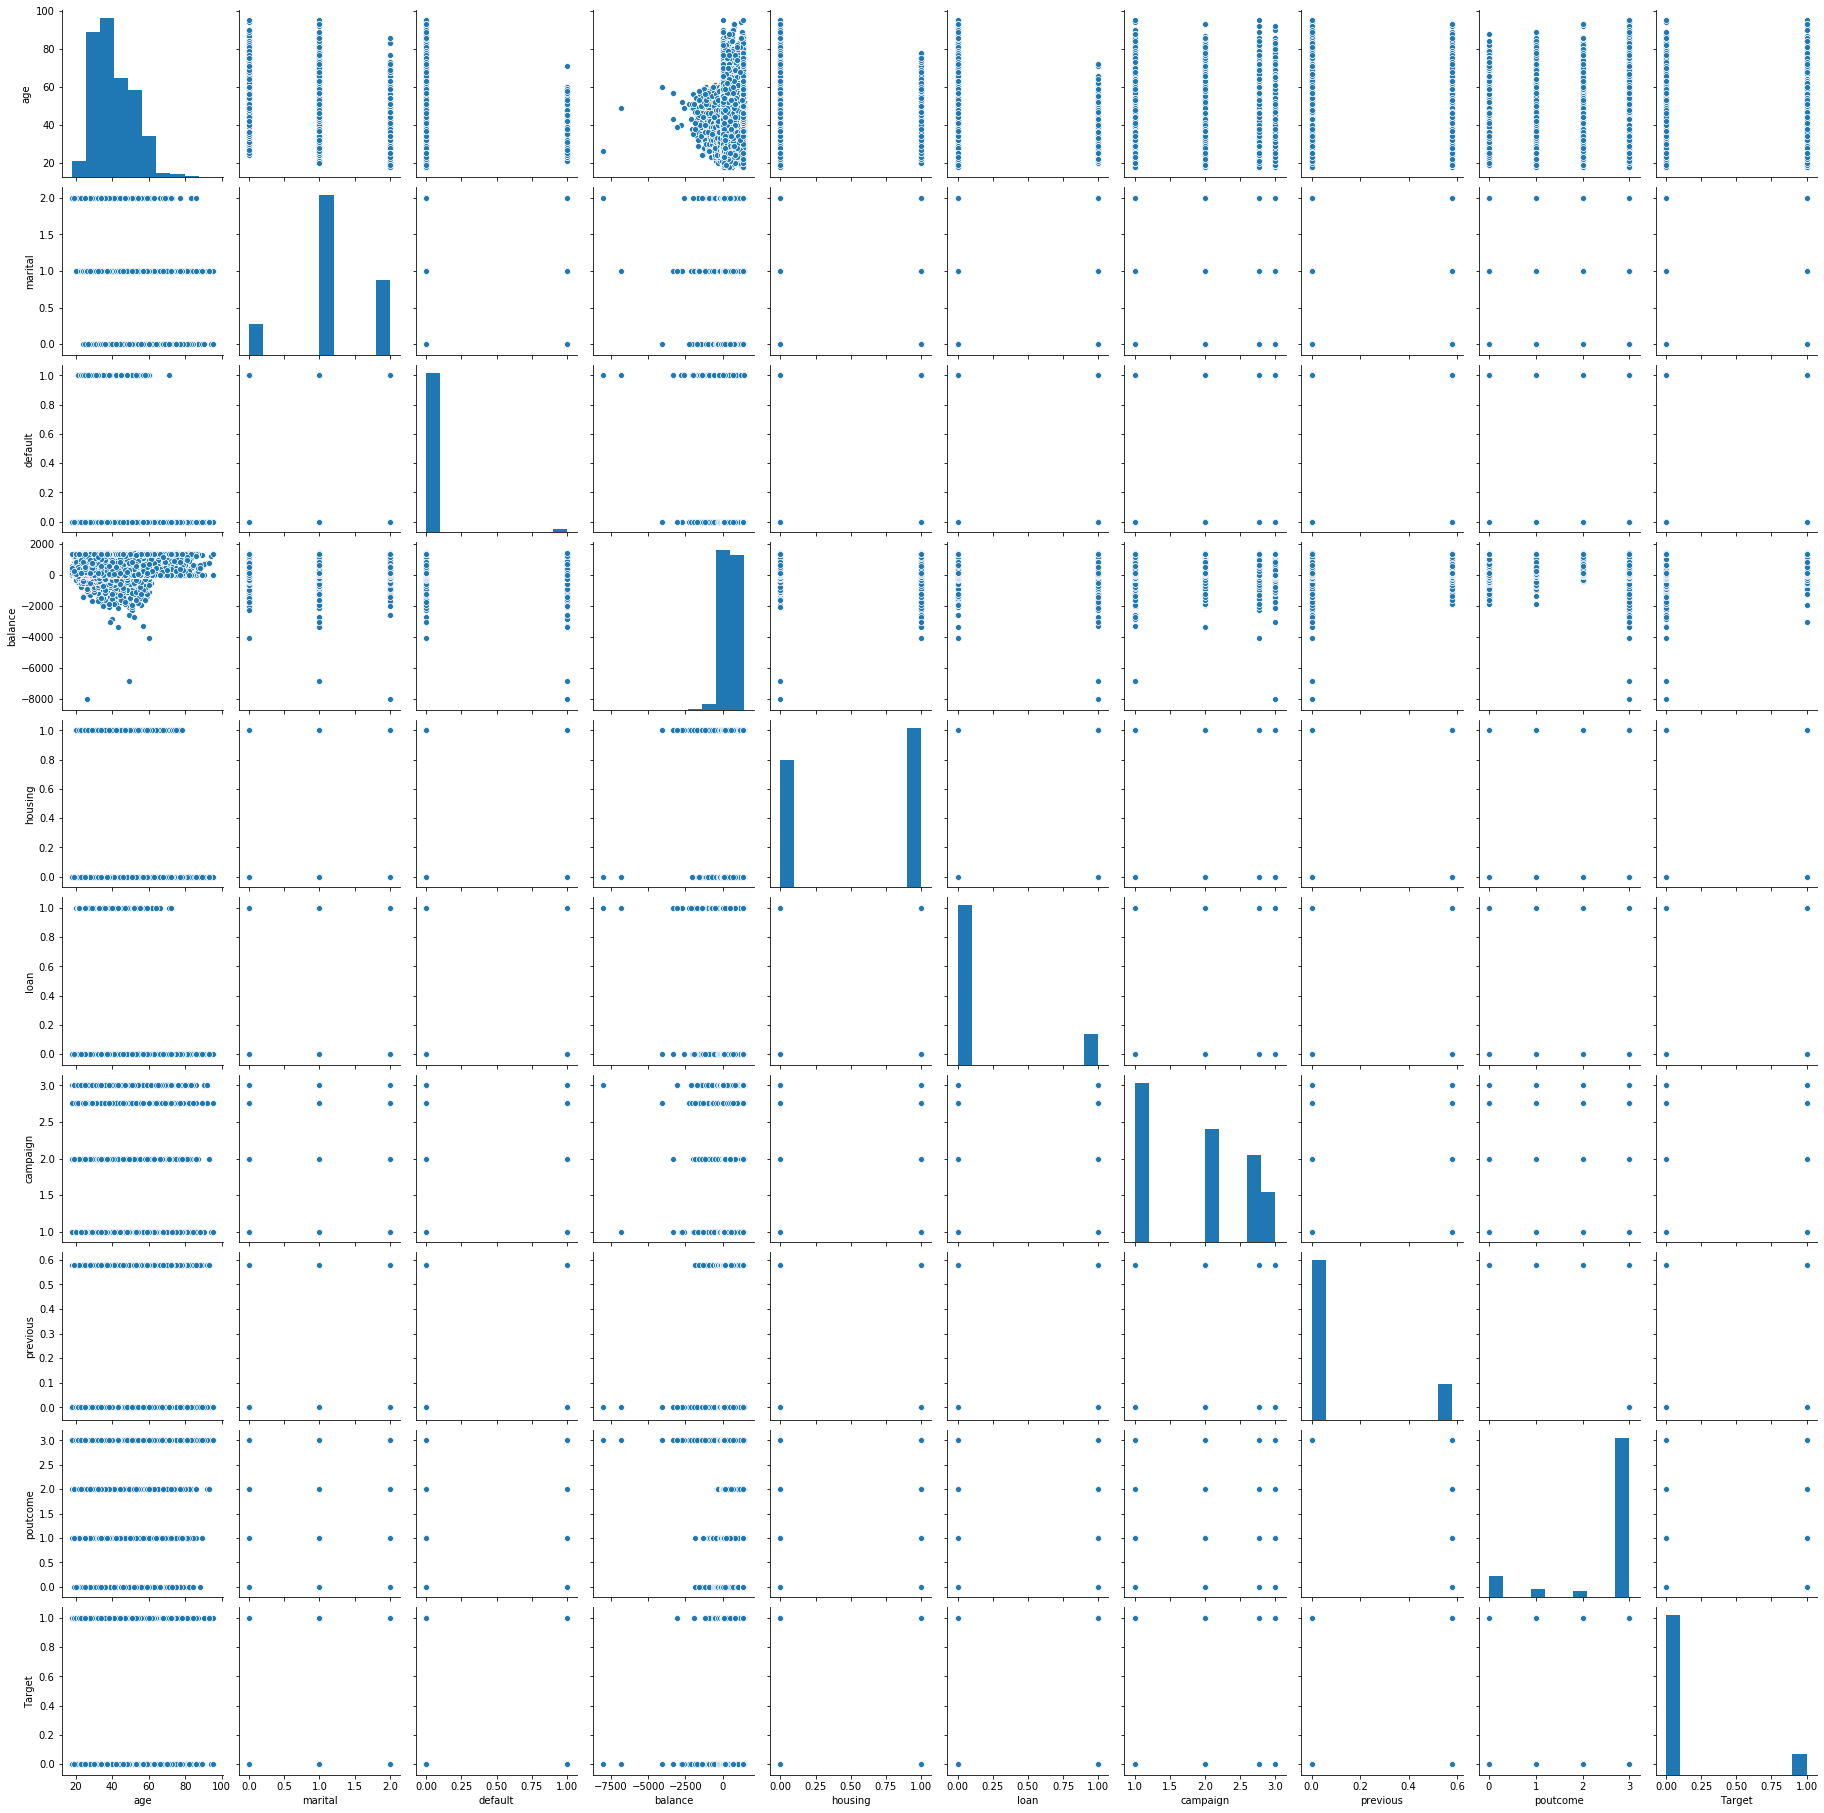

In [39]:
sns.pairplot(df2)

## Split data for training and testing (70:30)

In [40]:
x=df2.drop('Target',axis=1)
y=df2['Target']

In [41]:
x.head(1)

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3


In [42]:
y.head(1)

0    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

## Scaling the data

In [44]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)


## Models

## Logistic Regression Model

In [45]:
logic_r=LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled,ytrain)
y_pred=logic_r.predict(xtest_scaled)
LR_accuracy=accuracy_score(ytest,y_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_pred))
print('\nAccuracy Score\n',LR_accuracy*100)
print('\n Classification report\n',classification_report(ytest,y_pred))



Confusion Matrix

 [[11892   107]
 [ 1318   247]]

Accuracy Score
 89.49424948392804

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



## Naive Bayes

In [47]:
NB=GaussianNB()
NB.fit(xtrain_scaled,ytrain)
y_predi=NB.predict(xtest_scaled)
NB_accuracy=accuracy_score(ytest,y_predi)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_predi))
print('\nAccuracy Score\n',NB_accuracy*100)
print('\n Classification report\n',classification_report(ytest,y_predi))


Confusion Matrix

 [[10667  1332]
 [ 1055   510]]

Accuracy Score
 82.40194632851666

 Classification report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



## KNN

In [49]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scaled,ytrain)
y_predict=knn.predict(xtest_scaled)

KNN_accuracy=accuracy_score(ytest,y_predict)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_predict))
print('\nAccuracy Score\n',KNN_accuracy*100)
print('\n Classification report\n',classification_report(ytest,y_predict))


Confusion Matrix

 [[11465   534]
 [ 1236   329]]

Accuracy Score
 86.95075199056326

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



## SVC Model

In [50]:
svc=SVC()
svc.fit(xtrain_scaled,ytrain)
y_pred1=svc.predict(xtest_scaled)

SVC_accuracy=accuracy_score(ytest,y_pred1)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,y_pred1))
print('\nAccuracy Score\n',SVC_accuracy*100)
print('\n Classification report\n',classification_report(ytest,y_pred1))


Confusion Matrix

 [[11856   143]
 [ 1287   278]]

Accuracy Score
 89.45738720141551

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



## Decision Tree

In [51]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scaled,ytrain)
dt_pred=dtree.predict(xtest_scaled)

DT_accuracy=accuracy_score(ytest,dt_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,dt_pred))
print('\nAccuracy Score\n',DT_accuracy*100)
print('\n Classification report\n',classification_report(ytest,dt_pred))


Confusion Matrix

 [[10820  1179]
 [ 1184   381]]

Accuracy Score
 82.57888528457681

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



## Bagging Ensemble 

In [52]:
bagc=BaggingClassifier(base_estimator=dtree,n_estimators=500,random_state=1)
bagc.fit(xtrain_scaled,ytrain)
bag_pred=bagc.predict(xtest_scaled)

BAG_accuracy=accuracy_score(ytest,bag_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,bag_pred))
print('\nAccuracy Score\n',BAG_accuracy*100)
print('\n Classification report\n',classification_report(ytest,bag_pred))


Confusion Matrix

 [[11549   450]
 [ 1231   334]]

Accuracy Score
 87.60690061928635

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## Adaptive Boosting Ensemble

In [53]:
adab=AdaBoostClassifier(n_estimators=50,random_state=1)
adab.fit(xtrain,ytrain)
ada_pred=adab.predict(xtest)

ADA_accuracy=accuracy_score(ytest,ada_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,ada_pred))
print('\nAccuracy Score\n',ADA_accuracy*100)
print('\n Classification report\n',classification_report(ytest,ada_pred))


Confusion Matrix

 [[11886   113]
 [ 1324   241]]

Accuracy Score
 89.40578000589797

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



## Random Forest Ensemble

In [54]:
randf=RandomForestClassifier(n_estimators=100,random_state=2,max_features=3)
randf.fit(xtrain,ytrain)
ran_pred=randf.predict(xtest)

RAN_accuracy=accuracy_score(ytest,ran_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,ran_pred))
print('\nAccuracy Score\n',RAN_accuracy*100)
print('\n Classification report\n',classification_report(ytest,ran_pred))


Confusion Matrix

 [[11536   463]
 [ 1226   339]]

Accuracy Score
 87.5479209672663

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## Gradient Boosting

In [55]:
grad=GradientBoostingClassifier(n_estimators=100,random_state=2)
grad.fit(xtrain,ytrain)
grad_pred=grad.predict(xtest)

GRAD_accuracy=accuracy_score(ytest,grad_pred)
print('\nConfusion Matrix\n\n',confusion_matrix(ytest,grad_pred))
print('\nAccuracy Score\n',GRAD_accuracy*100)
print('\n Classification report\n',classification_report(ytest,grad_pred))


Confusion Matrix

 [[11900    99]
 [ 1328   237]]

Accuracy Score
 89.47950457092303

 Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



## Model with Accuracy Scores

In [56]:
scores=[('Naive Bayes',NB_accuracy),
        ('KNN',KNN_accuracy),
        ('Logistic Reg',LR_accuracy),
        ('SVC',SVC_accuracy),
        ('Decision Tree',DT_accuracy),
        ('Bagging',BAG_accuracy),
        ('Adaptive boosting',ADA_accuracy),
        ('Gradient boosting',GRAD_accuracy),
        ('Random Forest',RAN_accuracy)       ]

scores=pd.DataFrame(scores,columns=['Model','Accuracy Score'])

print('\033[1m'' Current scores with Outliers replaced with mean: ]')
scores.sort_values(by='Accuracy Score',ascending=False)

 Current scores with Outliers replaced with mean: ]


,Model,Accuracy Score
2,Logistic Reg,0.894942
7,Gradient boosting,0.894795
3,SVC,0.894574
6,Adaptive boosting,0.894058
5,Bagging,0.876069
8,Random Forest,0.875479
1,KNN,0.869508
4,Decision Tree,0.825789
0,Naive Bayes,0.824019


The model performs well in Class 0

The model does not performs well in Class 1 as very less records

Dataset is imbalanced

Dataset contains large no of unknown strings in Contact 

Outliers did not affect much on prediction

Gradient boosting performed well

